Predicting the age of abalone from physical measurements using Logistic Regression

In [1]:
# Importing helpful package to load and hadle our data
import pandas as pd
import numpy as np

# import package for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Inline Priting of Visualizations
sns.set()
%matplotlib inline

# flexible and easy-to-use missing data visualizations
import missingno as msno

#  Import SK-Learn Library
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score , classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
#  Get data
abalone_data = pd.read_csv(r"E:\HimanshuSpace\books\dataScience\data\abalone.csv")
# Get glimpse of data
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Detail about each feature:
1. Sex : M, F, and I (infant)
2. Length: Longest shell measurement
3. Diameter: Perpendicular to length
4. Height: With meat in shell
5. Whole weight: Whole abalone
6. Shucked weight: Weight of meat
7. Viscera weight: Gut weight (after bleeding)
8. Shell weight: After being dried
9. Rings: +1.5 gives the age in years

In [3]:
# As Rings: +1.5 gives the age in years , So we will replace rings with age
abalone_data['Age'] = abalone_data['Rings'] + 1.5
abalone_data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [4]:
#  Now we will drop Rings
abalone_data.drop('Rings', axis=1, inplace=True)
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [5]:
# Get information about our dat frame
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


Inference from above info. 
1. We have 0 null data
2. Total No. of rows: 4177 
3. Total No. of columns : 9
4. Categorical feature: Sex
5. Quantative feature: Length,Diameter,Height,Whole weight,Shucked weight,Shucked weight,Viscera weight,Shell weight,Rings                               


In [6]:
# confirm null
abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

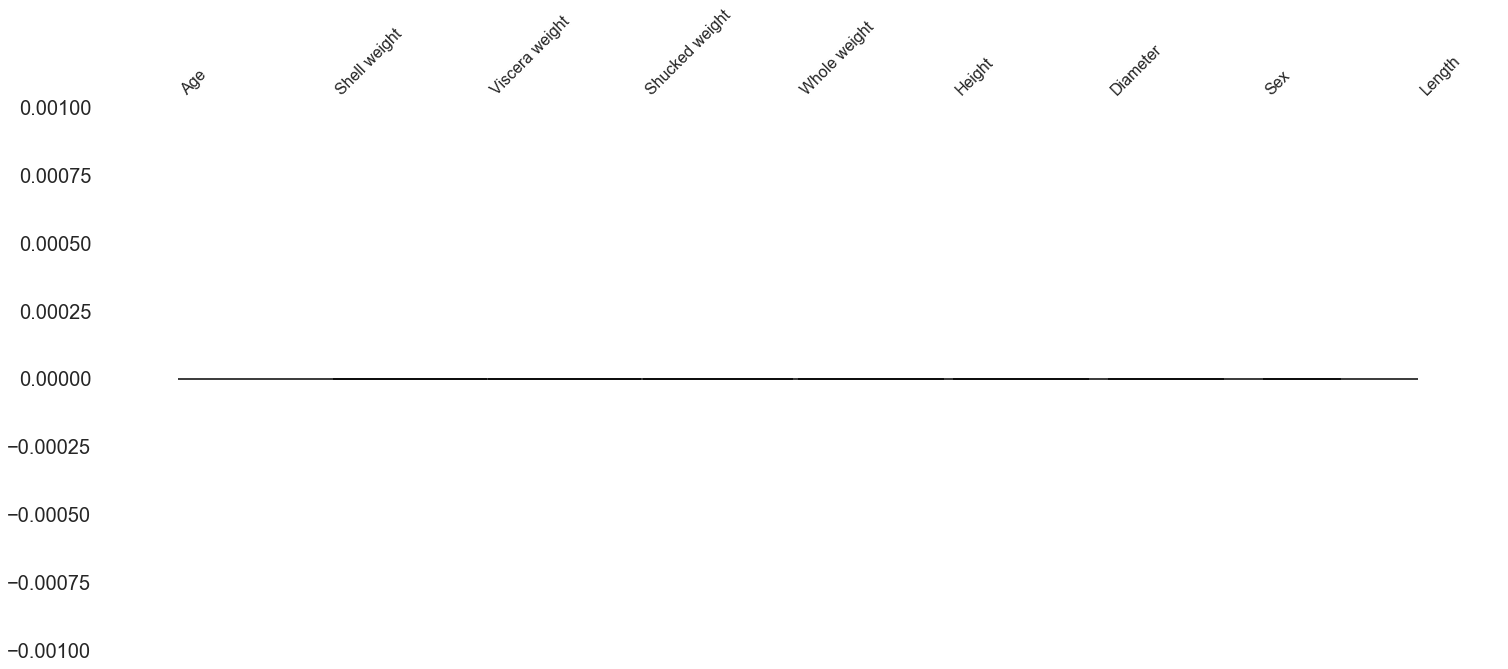

In [7]:
# Visualize missing data 
msno.dendrogram(abalone_data)
plt.show()

In [8]:
# Hence no null value, now we can do data visualization now look at description
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [9]:
#  Here we have height == 0 , but height(With meat in shell) can't be zero as its one parameter of dimension and 
# Shucked weight(Weight of meat) has some value
# But Sex say 'Infant', so it can be possible that infant has height equals to zero

# Check rows with height = 0 
abalone_data[abalone_data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


In [10]:
#  count number of rows and percentage having height = 0
print("No. of rows with height == 0 is {}".format((abalone_data['Height'] == 0).sum()))
print("Percentage of rows with height == 0 is {0:.4f}%".format(((abalone_data['Height'] == 0).sum() * 100 )/len(abalone_data)))

No. of rows with height == 0 is 2
Percentage of rows with height == 0 is 0.0479%


In [11]:
# As we have only 2 rows with 0 height, so we will drop these two rows
abalone_data = abalone_data[abalone_data['Height'] != 0]

In [12]:
# Confirm 0 height row
print("No. of rows with height == 0 is {}".format((abalone_data['Height'] == 0).sum()))

No. of rows with height == 0 is 0


# Visualization

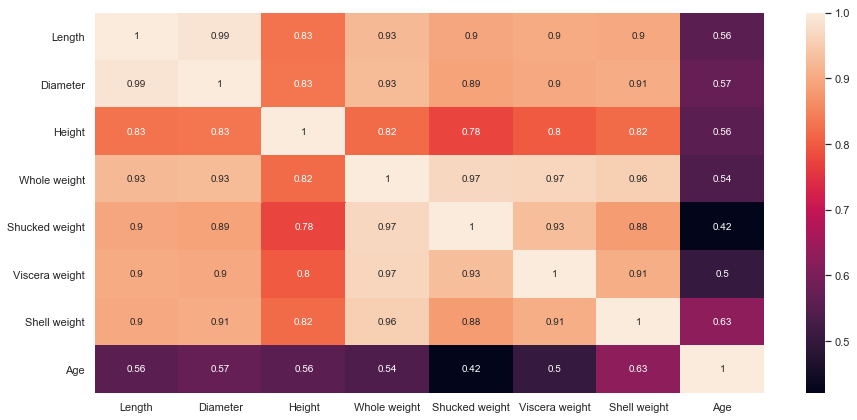

In [13]:
# Correlation between all features
# Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe.
# Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

fig,ax = plt.subplots()
fig.set_size_inches(15,7)
sns.heatmap(abalone_data.corr(),annot=True,ax=ax)
plt.show()

Inference
1. Viscera weight and Shucked weight have highest +ve correlation with all features
2. Age(Our output variable) has +ve corr with all features. max corr with 'Shell weight'

1. Length

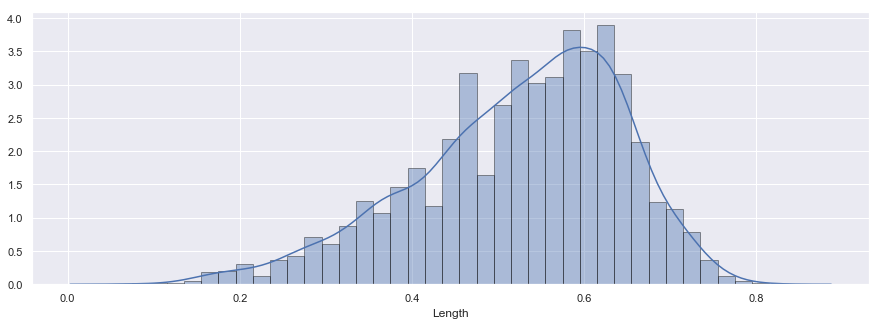

In [14]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(abalone_data['Length'],hist_kws={'edgecolor':'black'})
plt.show()

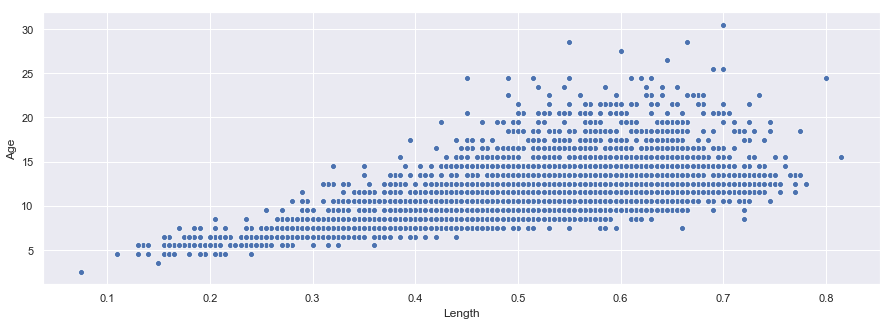

In [15]:
# Relation of Length vs rings
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.scatterplot(x="Length", y="Age",data = abalone_data,ax=ax)
plt.show()

2. Diameter

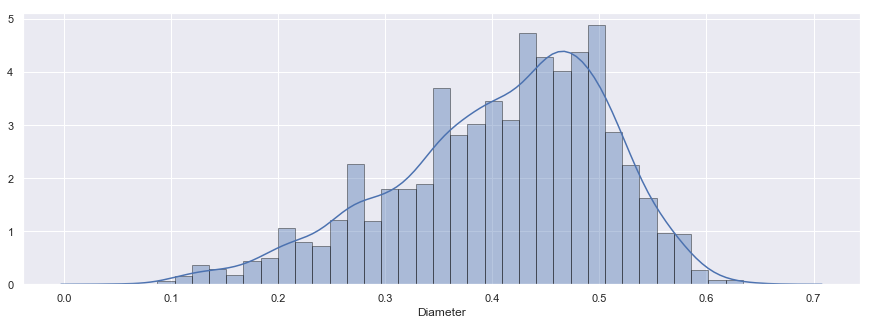

In [16]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(abalone_data['Diameter'],hist_kws={'edgecolor':'black'})
plt.show()

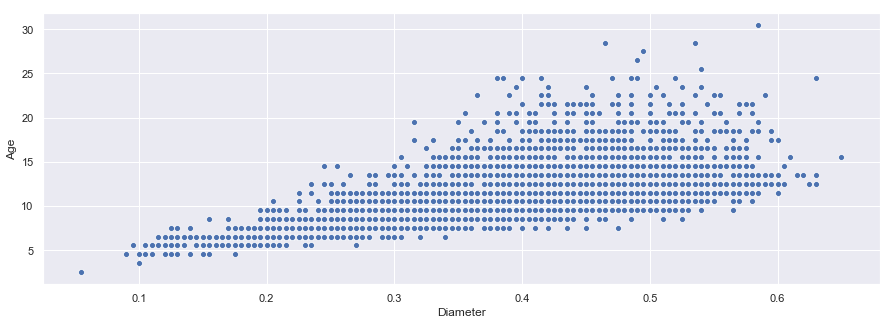

In [17]:
# Relation of Diameter vs rings
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.scatterplot(x="Diameter", y="Age",data = abalone_data,ax=ax)
plt.show()

3. Height

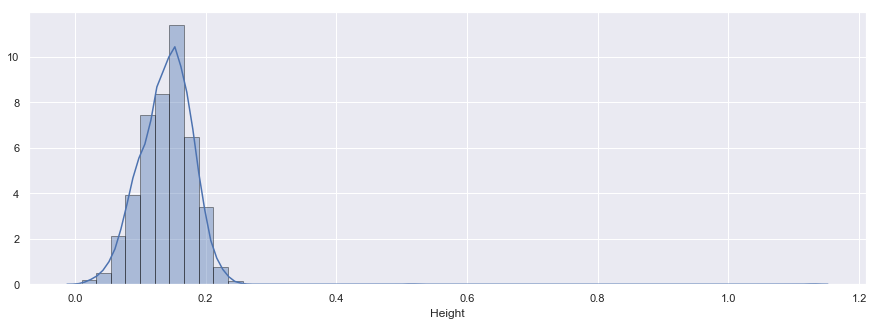

In [18]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(abalone_data['Height'],hist_kws={'edgecolor':'black'})
plt.show()

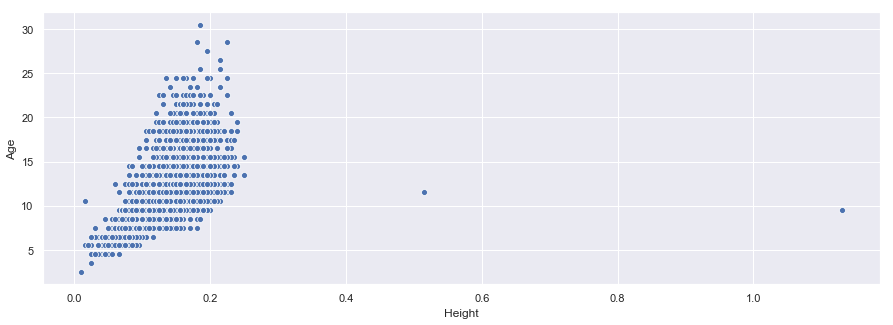

In [19]:
# Relation of Height vs rings
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.scatterplot(x="Height", y="Age",data = abalone_data,ax=ax)
plt.show()


4. Whole weight

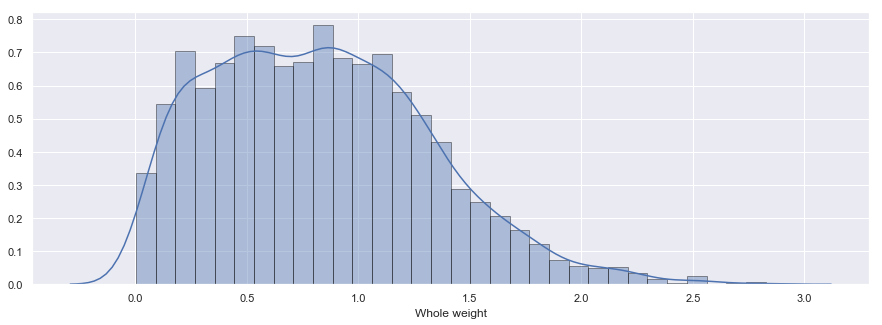

In [20]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(abalone_data['Whole weight'],hist_kws={'edgecolor':'black'})
plt.show()

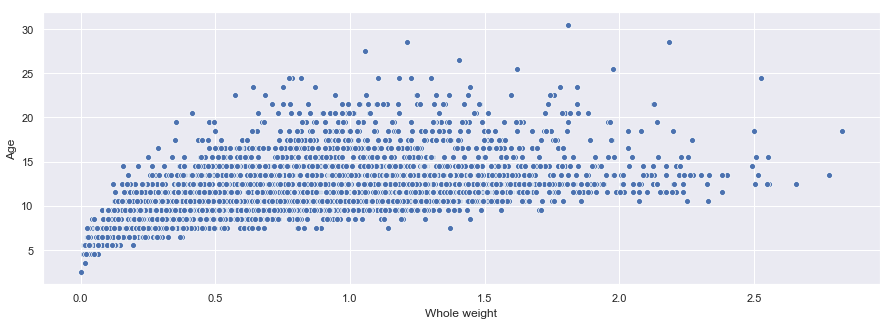

In [21]:
# Relation of Whole weight vs rings
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.scatterplot(x="Whole weight", y="Age",data = abalone_data,ax=ax)
plt.show()

 5. Shucked weight

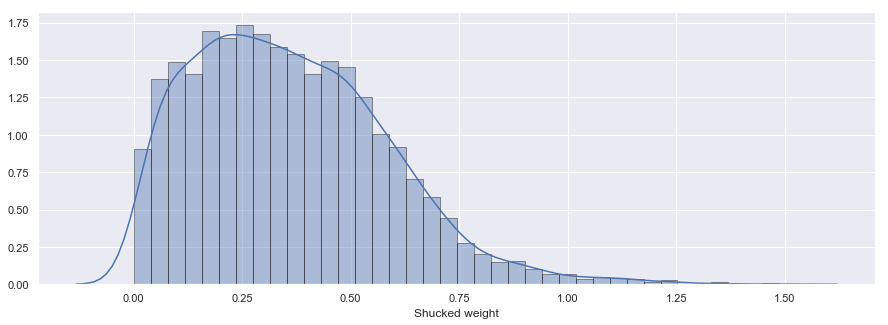

In [22]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(abalone_data['Shucked weight'],hist_kws={'edgecolor':'black'})
plt.show()

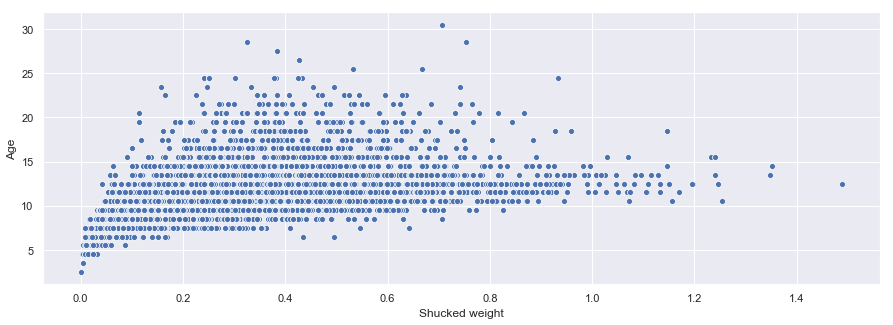

In [23]:
# Relation of Shucked weight vs rings
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.scatterplot(x="Shucked weight", y="Age",data = abalone_data,ax=ax)
plt.show()

6. Viscera weight

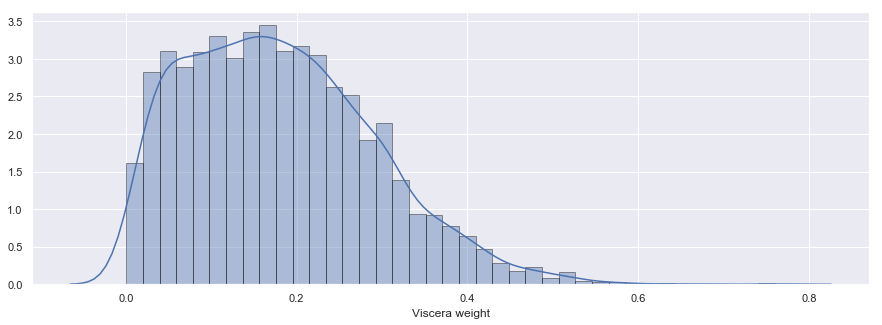

In [24]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(abalone_data['Viscera weight'],hist_kws={'edgecolor':'black'})
plt.show()

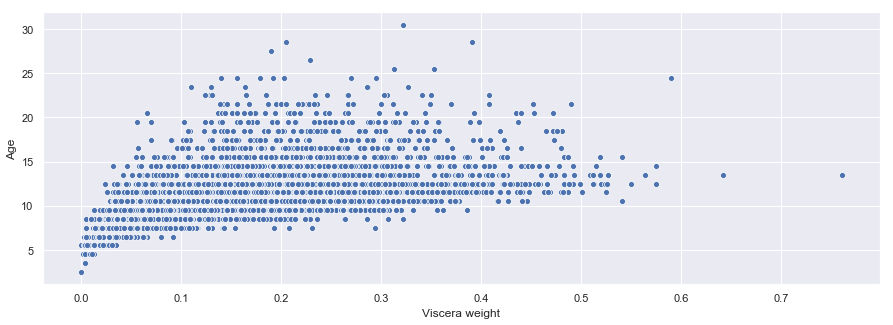

In [25]:
# Relation of Shucked weight vs rings
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.scatterplot(x="Viscera weight", y="Age",data = abalone_data,ax=ax)
plt.show()

7. Shell weight

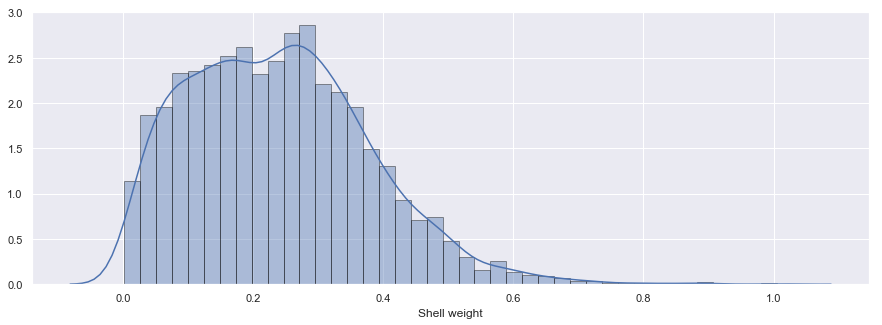

In [26]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(abalone_data['Shell weight'],hist_kws={'edgecolor':'black'})
plt.show()

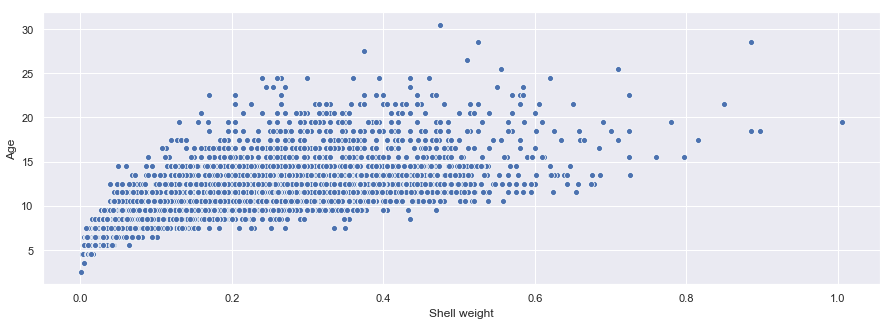

In [27]:
# Relation of Shell weight vs rings
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.scatterplot(x="Shell weight", y="Age",data = abalone_data,ax=ax)
plt.show()

8. Sex

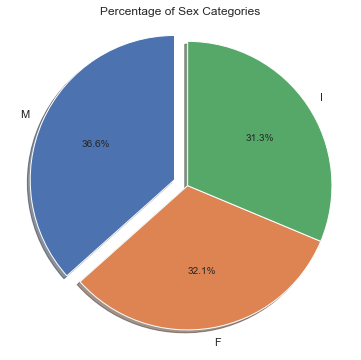

In [28]:
labels = abalone_data.Sex.unique().tolist()
sizes = abalone_data.Sex.value_counts().tolist()
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Sex Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

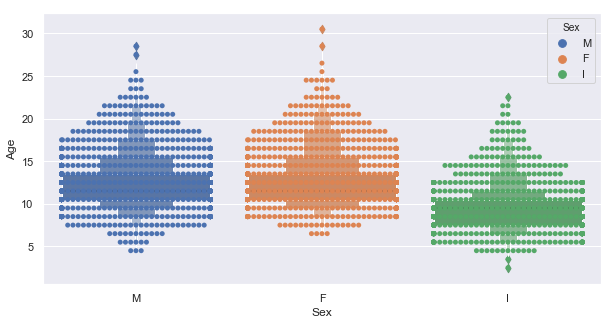

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
# sns.stripplot(x='Sex',y='Age',data=abalone_data,jitter=True,ax=ax)
sns.swarmplot(x = 'Sex', y = 'Age', data = abalone_data, hue = 'Sex')
sns.boxenplot(x='Sex',y='Age',data=abalone_data,ax=ax)
plt.show()
# jitter to bring out the distribution of values
# jitter option, a small amount of random noise is added to the vertical coordinate
# Jitter is a random value (or for our purposes pseudo-random) that is assigned to the dots to separate
# them so that they aren't plotted directly on top of each other

# one-hot encoding on categorical data

In [30]:
one_hot_encoders_abalone_df =  pd.get_dummies(abalone_data)
cols = one_hot_encoders_abalone_df.columns
abalone_clean_data = pd.DataFrame(one_hot_encoders_abalone_df,columns= cols)
abalone_clean_data.head(1)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,16.5,0,0,1


Scaling

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(
    sc_X.fit_transform(abalone_clean_data[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight']]),
                           columns=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight'],
                           index=abalone_clean_data.index)

In [32]:
numericals.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,-0.575276,-0.432829,-1.068619,-0.642485,-0.608200,-0.726809
1,-1.449876,-1.440813,-1.188465,-1.230912,-1.171446,-1.205857
2,0.049438,0.121562,-0.109856,-0.310030,-0.464009,-0.357258
3,-0.700219,-0.432829,-0.349547,-0.638406,-0.648754,-0.608188
4,-1.616466,-1.541611,-1.428155,-1.272724,-1.216506,-1.287980


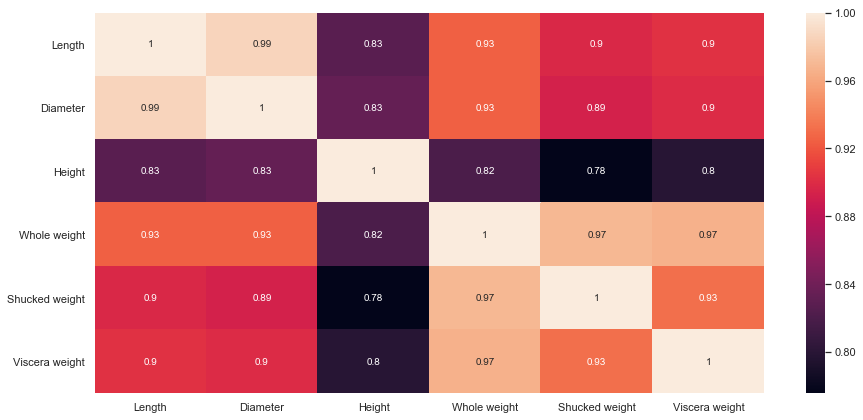

In [33]:
fig,ax = plt.subplots()
fig.set_size_inches(15,7)
sns.heatmap(numericals.corr(),annot=True,ax=ax)
plt.show()

In [34]:
# When deep=True (default), a new object will be created with a copy of the calling object’s data and indices.
# Modifications to the data or indices of the copy will not be reflected in the original object
abalone_clean_data_standard = abalone_clean_data.copy(deep=True)
abalone_clean_data_standard[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight']] = numericals[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight']]

In [35]:
abalone_clean_data_standard.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
0,-0.575276,-0.432829,-1.068619,-0.642485,-0.608200,-0.726809,0.150,16.5,0,0,1
1,-1.449876,-1.440813,-1.188465,-1.230912,-1.171446,-1.205857,0.070,8.5,0,0,1
2,0.049438,0.121562,-0.109856,-0.310030,-0.464009,-0.357258,0.210,10.5,1,0,0
3,-0.700219,-0.432829,-0.349547,-0.638406,-0.648754,-0.608188,0.155,11.5,0,0,1
4,-1.616466,-1.541611,-1.428155,-1.272724,-1.216506,-1.287980,0.055,8.5,0,1,0


In [36]:
x = abalone_clean_data_standard.drop(["Age"],axis=1)
y = abalone_clean_data_standard.Age
# y is float value and we will categorize ouput in two categories 0 and 1
y = np.where(y > 10,1,0)

In [37]:
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 23,test_size=0.3)

In [38]:
train_y

array([1, 0, 0, ..., 0, 0, 1])

# Model Training

In [39]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
y_pred = logreg.predict(test_x) 

In [40]:
print("accuracy: "+ str(accuracy_score(test_y,y_pred)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
print("R2 score: {}".format(r2_score(test_y, y_pred)))
print("intercept: {}".format(logreg.intercept_))

accuracy: 84.11811652035117%
Mean absolute error: 0.15881883479648842
Mean squared error: 0.15881883479648842
R2 score: 0.28979179127858956
intercept: [0.39221816]


In [41]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       423
           1       0.85      0.92      0.88       830

   micro avg       0.84      0.84      0.84      1253
   macro avg       0.83      0.81      0.82      1253
weighted avg       0.84      0.84      0.84      1253



1. Recall: Recall is the ratio of a number of events you can correctly recall to a number of all correct events.
2. Precision: Precision is the ratio of a number of events you can correctly recall to a number all events you recall (mix of                 correct and wrong recalls). In other words, it is how precise of your recall.

"If a machine learning algorithm is good at recall, it doesn’t mean that algorithm is good at precision. That’s why we also need F1 score which is the (harmonic) mean of recall and precision to evaluate an algorithm."
3. F1 score: single metric that combines recall and precision using the harmonic mean

https://www.quora.com/What-is-the-best-way-to-understand-the-terms-precision-and-recall